# Loading The Data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
train=pd.read_csv('train.csv')


In [13]:
test=pd.read_csv('test.csv')

In [14]:
sample=pd.read_csv('sample_submission.csv')

In [15]:
pd.set_option('display.max_columns', None) 
#The above code is to make sure that all the columns are displayed; by setting the display.max_columns option 
#to None (which means there will be no max limit to the number of columns that can be displayed now).

# Exploratory Data Analysis (EDA)

### Shape of the data:

In [16]:
train.shape

(100000, 76)

### 10 random rows from the data:

In [17]:
train.sample(10)

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,Processor,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,OSBuildLab,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,NumericOSVersion,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
65975,a48bcbb8522dae45f6adfddd98605638,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1504.0,0,7.0,0,53447.0,1.0,1.0,1,93,56957.0,277.0,75,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Notebook,Windows.Desktop,4142.0,120212.0,4.0,5.0,2523.0,715404.0,HDD,119233.0,0,4096.0,Laptop,15.5,1366.0,768.0,Mobile,0.000000e+00,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,8.0,31,FullAuto,0,IS_GENUINE,Retail,0.0,Retail,807.0,51746.0,0,0.0,0,0,0.0,0.0,8.0,2018-08-16 14:45:00,2018-08-14,1
69006,4b6e4c600cafcc977c20e19d1401c77a,win8defender,1.1.15100.1,4.18.1807.18075,1.273.738.0,0,7.0,0,53447.0,1.0,1.0,1,171,157510.0,211.0,182,windows10,x64,10.0.0.0,16299,768,rs3,16299.15.amd64fre.rs3_release.170928-1534,Home,1.0,0,0.0,135.0,1.0,1.0,Desktop,Windows.Desktop,4589.0,313586.0,4.0,5.0,2559.0,953869.0,HDD,952908.0,0,8192.0,Desktop,23.1,1920.0,1080.0,Desktop,4.294967e+09,10.0.16299.125,amd64,rs3_release,16299,125,Core,CORE,Reset,29.0,125,UNKNOWN,0,IS_GENUINE,Retail,0.0,Retail,142.0,3839.0,0,0.0,0,0,0.0,1.0,3.0,2018-08-02 16:51:00,2017-12-12,1
44634,45c98b8d0a11291e86d260077fae66db,win8defender,1.1.15200.1,4.18.1807.18075,1.275.995.0,0,7.0,0,53447.0,1.0,1.0,1,33,62354.0,23.0,75,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,1980.0,224721.0,2.0,1.0,444.0,953869.0,UNKNOWN,49669.0,0,4096.0,Desktop,18.9,1440.0,900.0,Desktop,4.294967e+09,10.0.17134.254,amd64,rs4_release,17134,254,Professional,PROFESSIONAL,IBSClean,29.0,125,FullAuto,0,IS_GENUINE,Retail,0.0,Retail,168.0,33778.0,0,0.0,0,0,0.0,1.0,3.0,2018-09-10 06:06:00,2018-08-30,0
23743,aa6b1bf7d26daf61b761379a73693374,win8defender,1.1.15200.1,4.18.1807.18075,1.275.622.0,0,7.0,0,53447.0,1.0,1.0,1,203,29003.0,255.0,46,windows10,x86,10.0.0.0,17134,768,rs4,17134.1.x86fre.rs4_release.180410-1804,Home,1.0,0,0.0,137.0,1.0,1.0,Detachable,Windows.Desktop,585.0,275771.0,4.0,5.0,1916.0,29820.0,SSD,28678.0,0,2048.0,Detachable,10.1,1280.0,800.0,Slate,2.916000e+03,10.0.17134.228,x86,rs4_release,17134,228,Core,CORE,Reset,39.0,160,FullAuto,0,IS_GENUINE,OEM:DM,0.0,Retail,513.0,63396.0,1,0.0,1,0,1.0,1.0,7.0,2018-09-02 15:03:00,2018-08-14,0
28872,fe75905714094a32eb75fb58837d95a4,win8defender,1.1.14405.2,4.12.16299.15,1.259.953.0,0,7.0,0,12306.0,2.0,0.0,1,51,71732.0,98.0,103,windows10,x64,10.0.0.0,16299,256,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Pro,0.0,0,NaN,117.0,1.0,1.0,AllInOne,Windows.Desktop,4589.0,313586.0,4.0,1.0,306.0,114473.0,SSD,113491.0,1,8192.0,Desktop,23.0,1680.0,1050.0,Desktop,4.294967e+09,10.0.16299.431,amd64,rs3_release_svc_escrow,16299,431,Professional,PROFESSIONAL,UUPUpgrade,5.0,2

### Data types of columns:

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

### Checking if there are any missing values in the data:

In [19]:
train.isna().sum()

MachineID             0
ProductName           0
EngineVersion         0
AppVersion            0
SignatureVersion      0
                   ... 
IsGamer             559
RegionIdentifier    559
DateAS                0
DateOS               24
target                0
Length: 76, dtype: int64

In [20]:
train.isna().sum()*100/train.shape[0]

MachineID           0.000
ProductName         0.000
EngineVersion       0.000
AppVersion          0.000
SignatureVersion    0.000
                    ...  
IsGamer             0.559
RegionIdentifier    0.559
DateAS              0.000
DateOS              0.024
target              0.000
Length: 76, dtype: float64

### A mathematical summary of the data (for numerical columns):

In [21]:
train.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,OSBuildNumber,OSProductSuite,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,InternalBatteryNumberOfCharges,OSBuildNumberOnly,OSBuildRevisionOnly,OSInstallLanguageID,OSUILocaleID,IsPortableOS,IsFlightsDisabled,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,100000.000000,100000.000000,100000.000000,99924.000000,100000.0,99019.000000,99893.000000,99834.000000,99981.000000,99788.000000,99772.000000,99915.000000,99915.000000,99915.000000,9.989000e+04,9.989000e+04,100000.00000,99849.000000,99928.000000,99928.000000,99928.000000,9.948500e+04,100000.000000,100000.000000,99887.000000,100000.000000,100000.000000,99674.0,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,122.695100,15917.208720,578.403380,0.955326,0.0,0.000505,124.053848,0.980067,0.996569,2209.573265,238780.914154,4.011500,4.530711,2367.693069,5.158619e+05,3.819905e+05,0.08140,6132.087442,16.708674,1552.230416,898.253192,1.118069e+09,15990.596350,986.531360,14.519267,60.030870,0.000520,0.0,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,69.242252,1943.421132,247.240971,0.206588,0.0,0.022466,33.535395,0.139771,0.266669,1300.863891,71708.483379,2.033075,1.288050,837.822392,3.525624e+05,3.246240e+05,0.27345,4813.882548,6.031598,363.438980,213.695880,1.884682e+09,1810.756601,2971.429862,10.142233,44.715508,0.022798,0.0,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,1.000000,7601.000000,16.000000,0.000000,0.0,0.000000,39.000000,0.000000,0.000000,46.000000,22.000000,1.000000,1.000000,3.000000,1.228800e+04,1.088000e+04,0.00000,512.000000,5.300000,400.000000,300.000000,0.000000e+00,10240.000000,0.000000,1.000000,5.000000,0.000000,0.0,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,74.000000,16299.000000,256.000000,1.000000,0.0,0.000000,111.000000,1.000000,1.000000,1443.000000,189586.000000,2.000000,5.000000,1998.000000,2.441980e+05,1.208410e+05,0.00000,4096.000000,13.900000,1366.000000,768.000000,0.000000e+00,16299.000000,167.000000,8.000000,31.000000,0.000000,0.0,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,88.000000,16299.000000,768.000000,1.000000,0.0,0.000000,135.000000,1.000000,1.000000,2102.000000,246528.000000,4.000000,5.000000,2503.000000,4.769400e+05,2.567655e+05,0.00000,4096.000000,15.500000,1366.000000,768.000000,0.000000e+00,16299.000000,285.000000,9.000000,34.000000,0.000000,0.0,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,182

### A mathematical summary of the data (for categorical columns):

In [22]:
train.describe(include=['object'])

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,PlatformType,Processor,OSVersion,OsPlatformSubRelease,OSBuildLab,SKUEditionName,MDC2FormFactor,DeviceFamily,PrimaryDiskType,ChassisType,PowerPlatformRole,NumericOSVersion,OSArchitecture,OSBranch,OSEdition,OSSkuFriendlyName,OSInstallType,AutoUpdateOptionsName,OSGenuineState,LicenseActivationChannel,FlightRing,DateAS,DateOS
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,99977,99998,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,99976
unique,99835,2,37,69,2735,4,3,7,9,281,8,11,2,4,28,9,221,3,13,20,18,9,6,4,6,7,2695,112
top,232f69b758bf5e3f5aa55125ed8f0abc,win8defender,1.1.15200.1,4.18.1807.18075,1.273.1420.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,Notebook,Windows.Desktop,HDD,Notebook,Mobile,10.0.17134.228,amd64,rs4_release,Core,CORE,UUPUpgrade,FullAuto,IS_GENUINE,Retail,Retail,2018-08-15 06:29:00,2018-08-14
freq,2,99771,45219,62119,1274,98344,91262,98368,45837,42964,62863,64547,99971,66202,59459,69874,17069,91281,46909,39275,39273,32033,45154,89860,52195,94153,1274,20905


### Checking if there are any rows that are duplicated:

In [23]:
train.duplicated().sum()

np.int64(165)

## Insight: Since there exist some duplicate rows in the dataset, we need drop all the duplicate rows

**Checking many unique categories/values there are in each column:**

In [24]:
train.nunique()

MachineID           99835
ProductName             2
EngineVersion          37
AppVersion             69
SignatureVersion     2735
                    ...  
IsGamer                 2
RegionIdentifier       15
DateAS               2695
DateOS                112
target                  2
Length: 76, dtype: int64

**Checking how many rows there are in each category of Crime_Category:**

In [25]:
train['target'].value_counts()

target
1    50525
0    49475
Name: count, dtype: int64

### Showing a bar chart is better idea in place of pie chart because of close valeues of targets 0 and 1


Target Value Counts:
 target
1    50525
0    49475
Name: count, dtype: int64


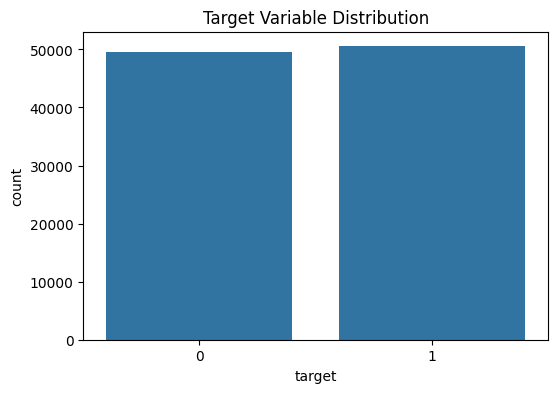

In [26]:
print("\nTarget Value Counts:\n", train['target'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=train)
plt.title('Target Variable Distribution')
plt.show()


### List of columns that has null/missing values greater than 80%:

In [27]:
# Find columns with more than 80% missing values
threshold = 0.6  # 60%
missing_ratio = train.isna().sum() / len(train)
cols_to_drop_missing = missing_ratio[missing_ratio > threshold].index.tolist()

print("Columns to drop due to high missing values:")
print(cols_to_drop_missing)


Columns to drop due to high missing values:
[]


###  List of columns that has very low variance:

In [28]:
from sklearn.feature_selection import VarianceThreshold

# Set a threshold for very low variance (e.g., 0.01)
variance_threshold = 0.01

# Apply VarianceThreshold to numerical columns only
numeric_cols = train.select_dtypes(include=[float, int]).columns
selector = VarianceThreshold(threshold=variance_threshold)
selector.fit(train[numeric_cols])

# Get columns with very low variance
low_variance_cols = numeric_cols[~selector.get_support()]
print(f"Columns with very low variance (threshold < {variance_threshold}):\n{list(low_variance_cols)}")

Columns with very low variance (threshold < 0.01):
['IsBetaUser', 'HasTpm', 'AutoSampleSubmissionEnabled', 'SMode', 'IsPortableOS', 'IsFlightsDisabled', 'IsVirtualDevice']


## Feature Analysis and Recommendations  

### Identified Low Variance Columns:  
- **IsBetaUser**: 100% of values are `0` (No variance)  
- **AutoSampleSubmissionEnabled**: 100% of values are `0` (No variance)  
- **IsFlightsDisabled**: 99.67% of values are `0.0`  
- **HasTpm**: 99.68% of values are `1`  
- **SMode**: 98.97% of values are `0.0`  
- **IsPortableOS**: 99.95% of values are `0`    
- **IsVirtualDevice**: 99.60% of values are `0.0`  

### Reasoning:  
These columns demonstrate extremely low variability or significant class imbalance, indicating minimal potential for contributing useful information to the model. Including such features may add noise and risk overfitting, where the model learns patterns that do not generalize well to new data.  

### Recommendation:  
- **Remove** these low-variance columns to improve model performance.  
- **Enhance** training efficiency by reducing irrelevant features.  
- **Focus** on features with substantial predictive power, contributing to a more robust and generalized model.  


### Purpose: Visualize the distribution of missing values across the dataset.

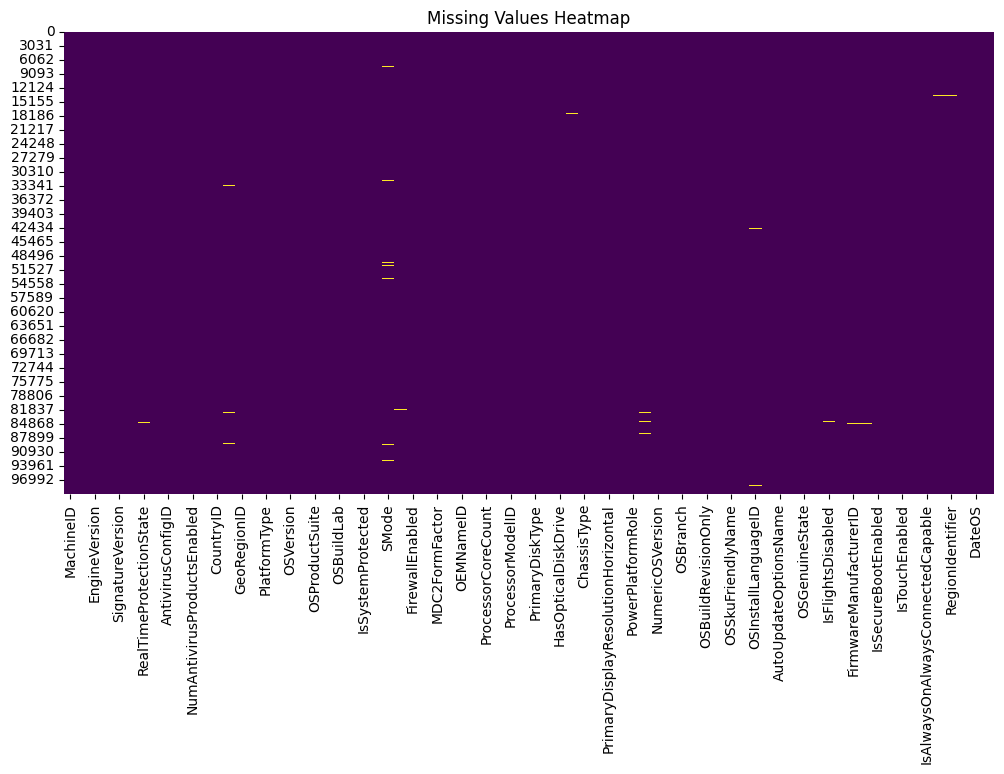

In [29]:
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


### Purpose: Show the frequency of each category for selected categorical columns.

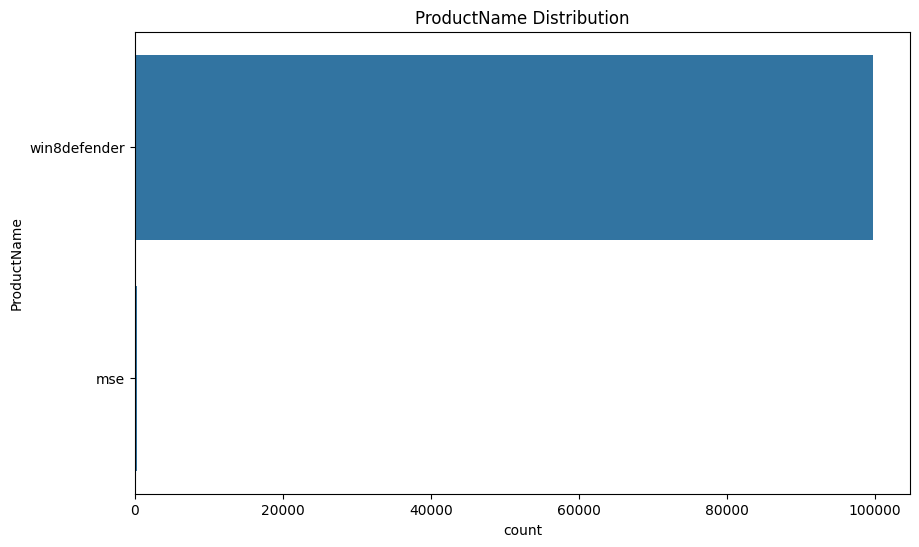

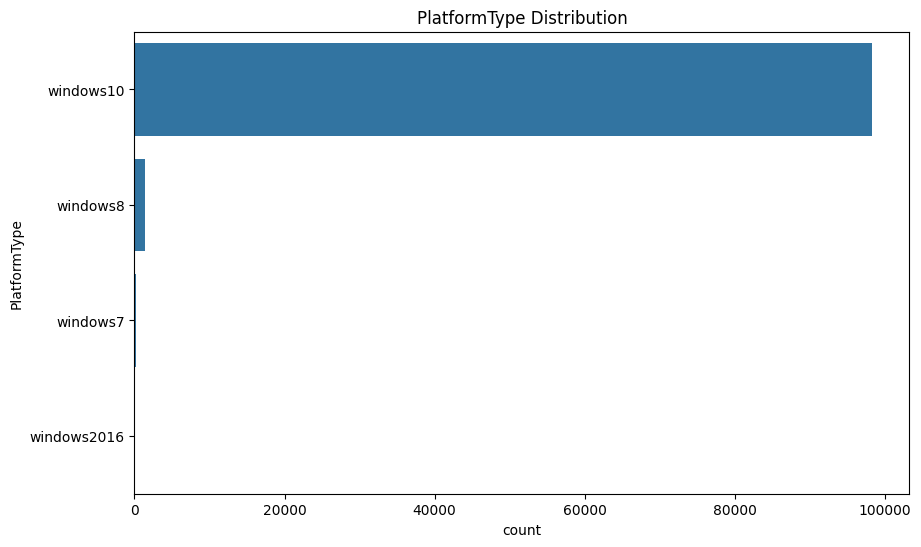

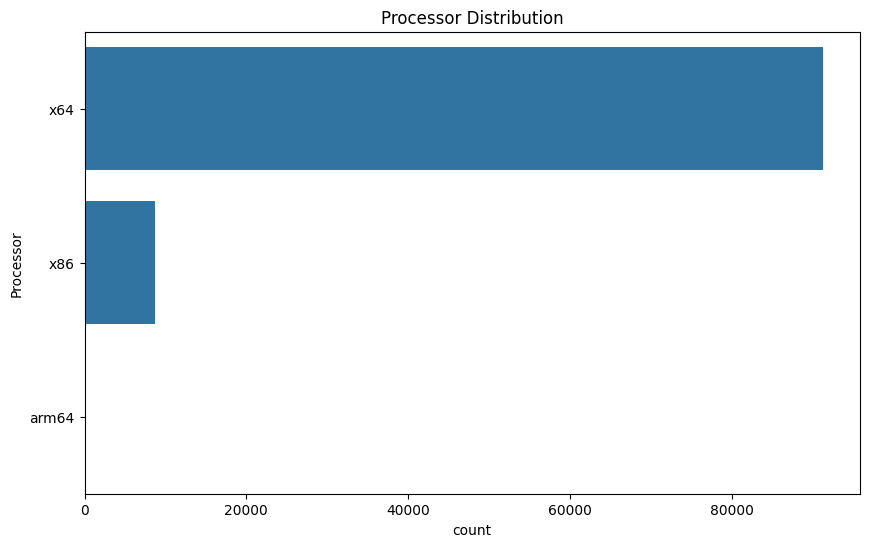

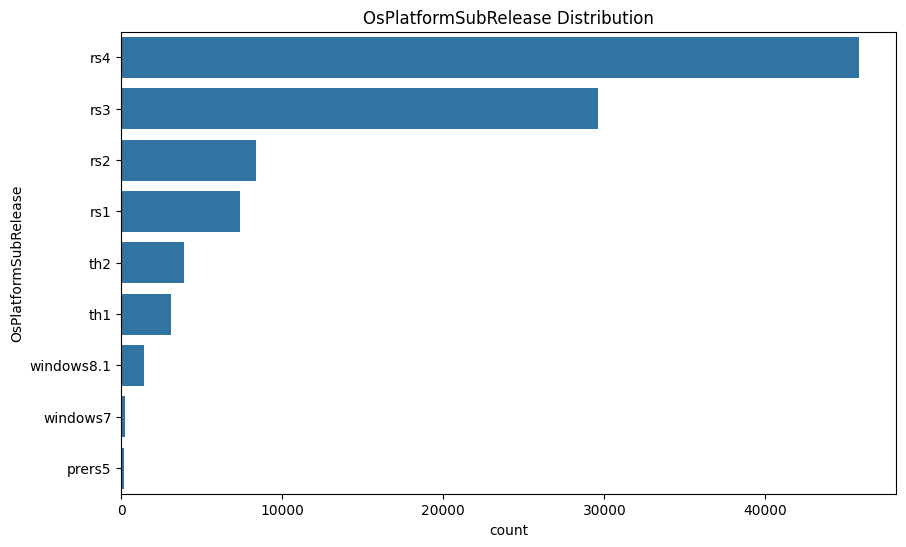

In [30]:
categorical_cols = ['ProductName', 'PlatformType', 'Processor', 'OsPlatformSubRelease']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=train[col], order=train[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.show()


## Insights from Categorical Feature Distributions

### 1. ProductName Distribution
- The `win8defender` product dominates the dataset, with very few `mse` entries.

### 2. PlatformType Distribution
- `windows10` is the most prevalent platform, with other versions being minimal.

### 3. Processor Distribution
- `x64` architecture is predominant, with limited samples for `x86` and `arm64`.

### 4. OsPlatformSubRelease Distribution
- `rs4` and `rs3` sub-releases are the most common, while others are rare.


### Purpose: Display the distribution of numerical features to identify skewness, outliers, and general patterns.


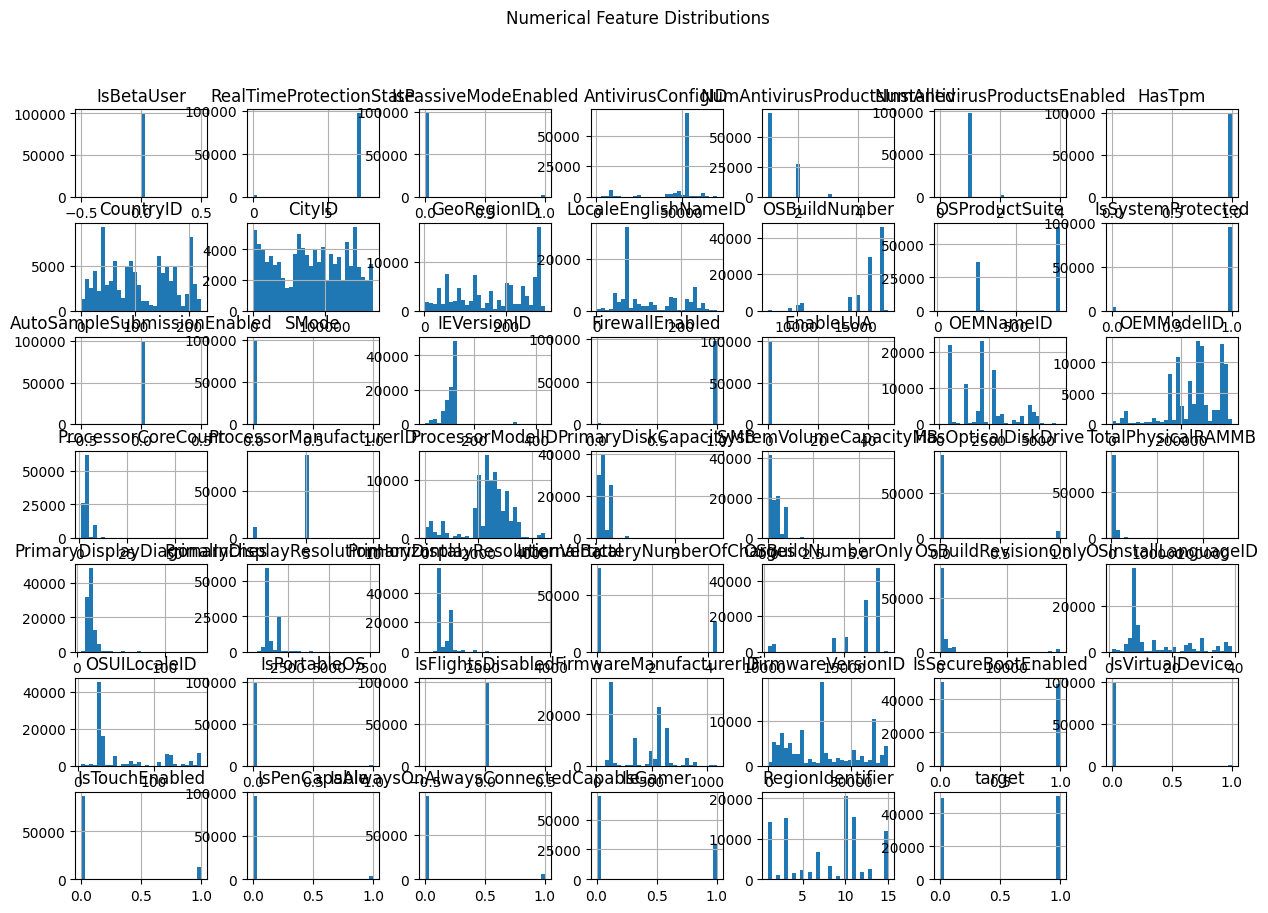

In [31]:

# Descriptive statistics of numerical features
numerical_cols = train.select_dtypes(include=[np.number]).columns
train[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Numerical Feature Distributions')
plt.show()


### Purpose: Identify relationships between numerical features through correlation.

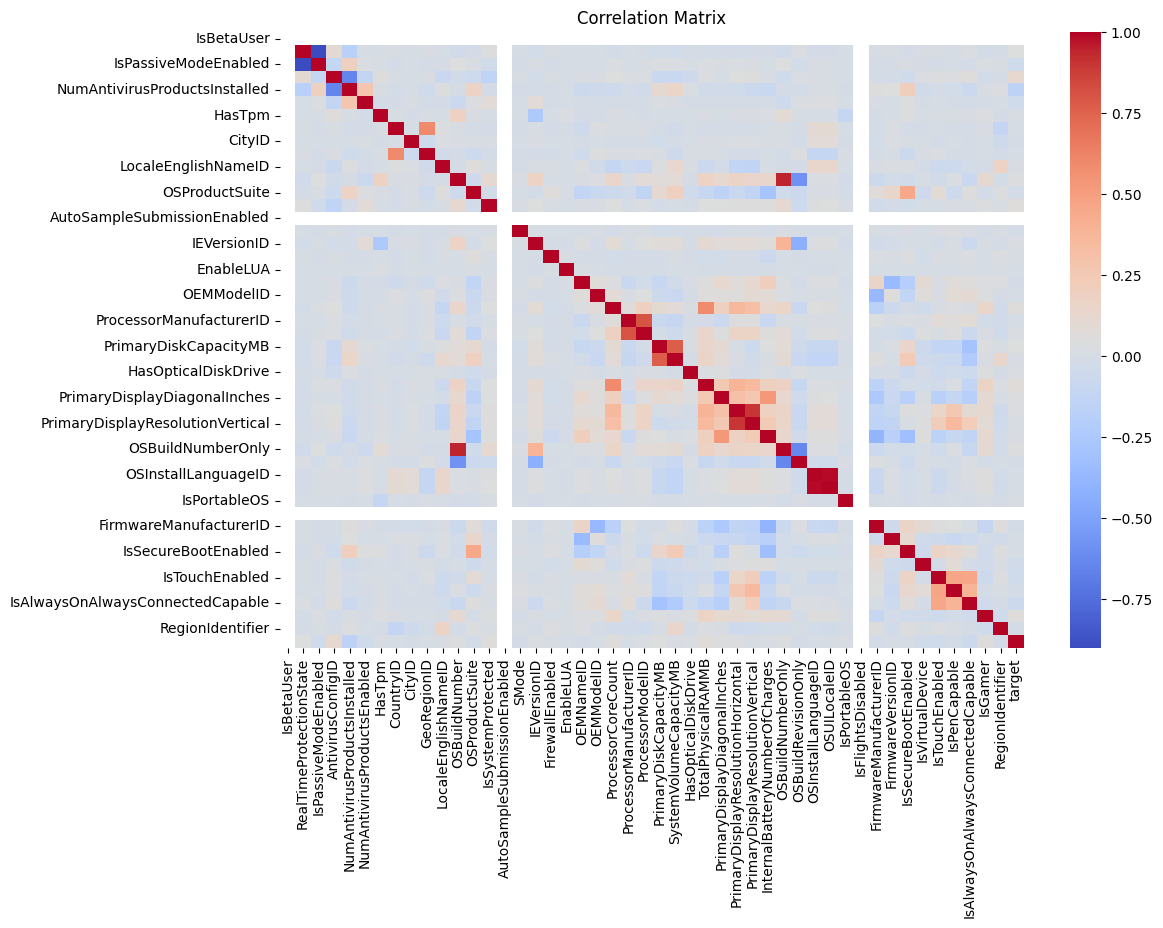

In [32]:
correlation_matrix = train[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()


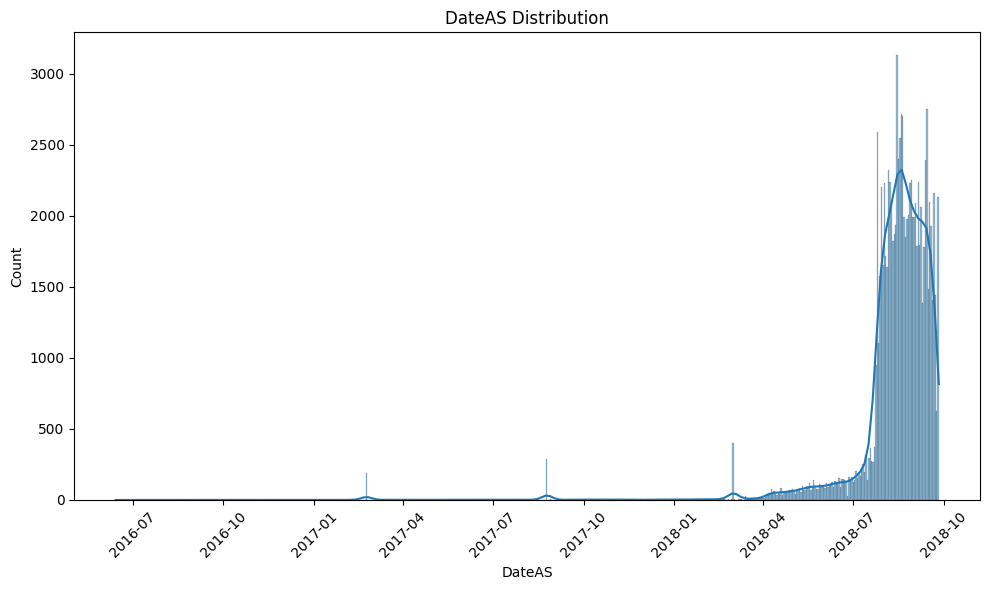

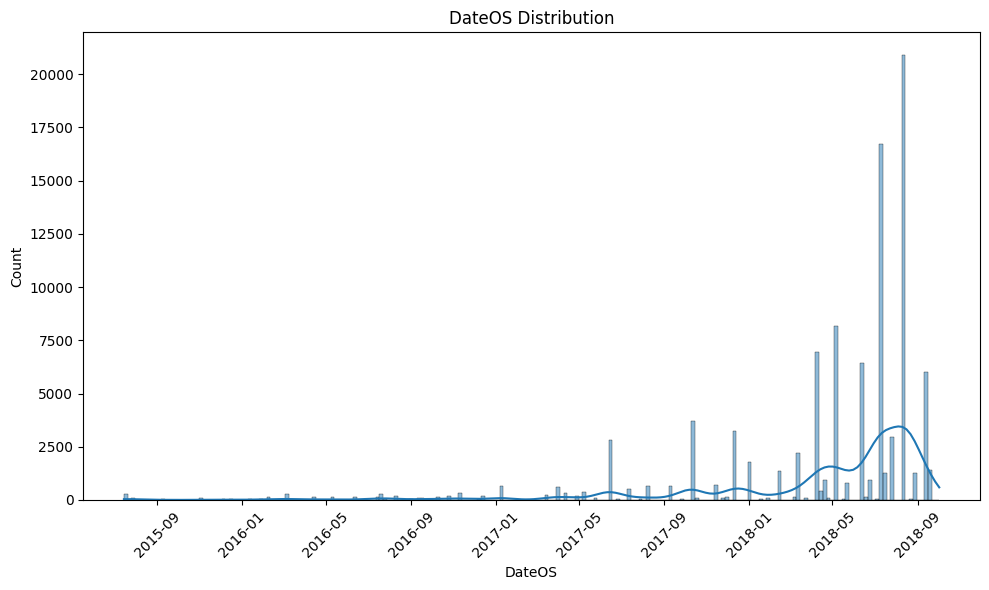

In [33]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

for i in ['DateAS', 'DateOS']:
    train[i] = pd.to_datetime(train[i], errors='coerce')
    # Droping NaN values safely
    valid_dates = train[i].dropna()
    
    plt.figure(figsize=(10, 6))
    sns.histplot(valid_dates, kde=True)
    plt.title(f'{i} Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


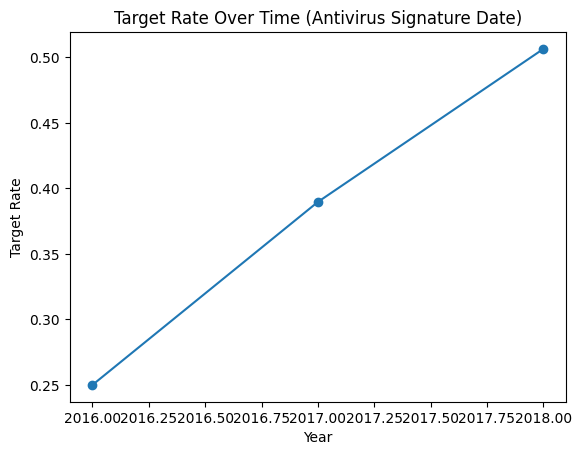

In [34]:
train['DateAS'] = pd.to_datetime(train['DateAS'])
train.groupby(train['DateAS'].dt.year)['target'].mean().plot(kind='line', marker='o')
plt.title("Target Rate Over Time (Antivirus Signature Date)")
plt.xlabel("Year")
plt.ylabel("Target Rate")
plt.show()


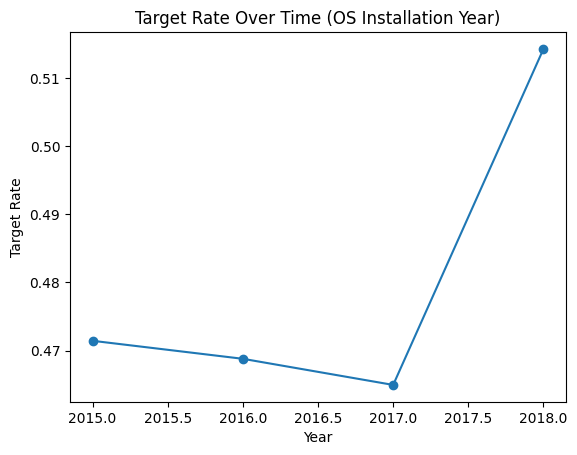

In [35]:
train['DateOS'] = pd.to_datetime(train['DateOS'])  # Ensure it's datetime
train.groupby(train['DateOS'].dt.year)['target'].mean().plot(kind='line', marker='o')
plt.title("Target Rate Over Time (OS Installation Year)")
plt.xlabel("Year")
plt.ylabel("Target Rate")
plt.show()


### **DateAS and DateOS Distribution Analysis**

#### **Observations:**

1. **"DateAS" Distribution:**
   - The majority of the data is concentrated between early 2018 and late 2018.
   - Sparse entries are present before 2018, with almost no data before mid-2017.

2. **"DateOS" Distribution:**
   - A broader spread of data from 2016 to 2018.
   - There are clear spikes, with a significant increase in data volume in 2018.
   - The data volume peaks higher than in the "DateAS" distribution.

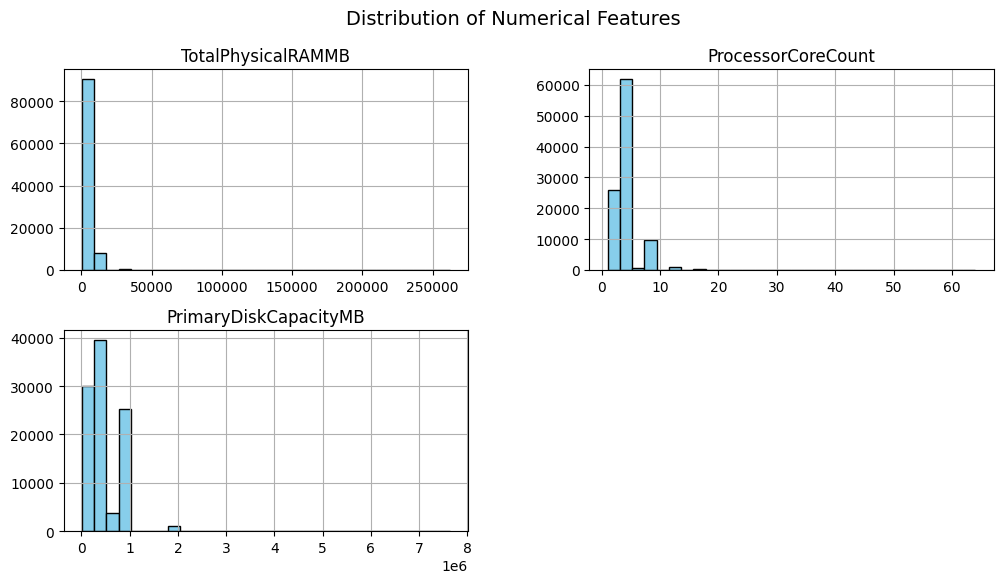

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features (excluding target)
num_features = ['TotalPhysicalRAMMB', 'ProcessorCoreCount', 'PrimaryDiskCapacityMB']

# Plot histograms
train[num_features].hist(figsize=(12, 6), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()


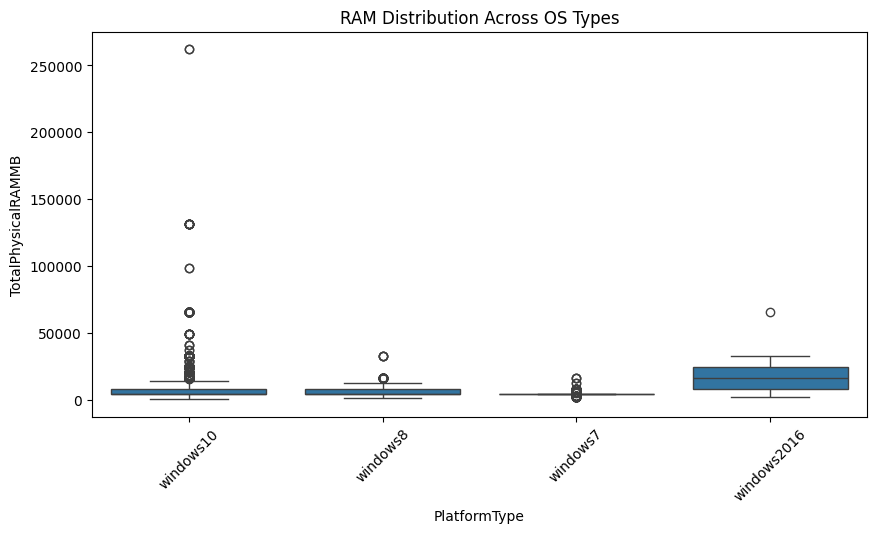

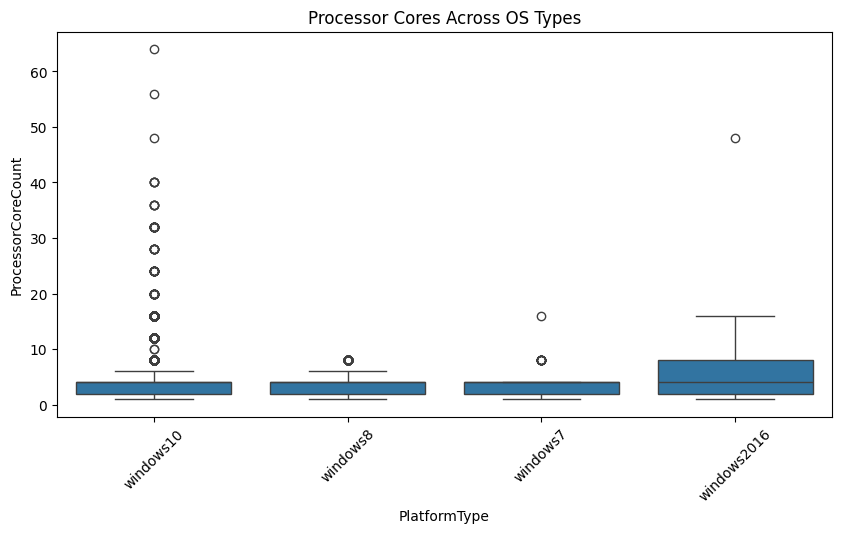

In [37]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='PlatformType', y='TotalPhysicalRAMMB', data=train)
plt.title("RAM Distribution Across OS Types")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='PlatformType', y='ProcessorCoreCount', data=train)
plt.title("Processor Cores Across OS Types")
plt.xticks(rotation=45)
plt.show()


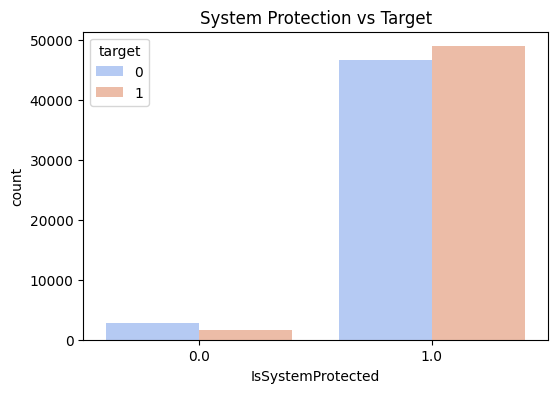

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(x='IsSystemProtected', hue='target', data=train, palette='coolwarm')
plt.title("System Protection vs Target")
plt.show()


## Insight
### System Protection vs Target
- Systems with protection enabled (`IsSystemProtected = 1`) are more likely to be targeted, indicating that protection status alone may not guarantee security.


# Preprocessing and Feature Engineering

* ### Dropping the duplicate rows:

In [39]:
train = train.drop_duplicates()

In [40]:
# test = test.drop_duplicates()

* ## Dropping the following columns, as decided during EDA:
- **IsBetaUser**
- **AutoSampleSubmissionEnabled**  
- **IsFlightsDisabled**  
- **HasTpm**
- **SMode** 
- **IsPortableOS**  
- **IsVirtualDevice**

In [41]:
cols_to_drop_missing = list(cols_to_drop_missing) 
low_variance_cols = list(low_variance_cols) 

cols_to_drop = list(set(cols_to_drop_missing + low_variance_cols))

train.drop(columns=cols_to_drop, inplace=True, errors='ignore')
test.drop(columns=cols_to_drop, inplace=True, errors='ignore')

print(f"Dropped {len(cols_to_drop)} columns: {cols_to_drop}")


Dropped 7 columns: ['IsVirtualDevice', 'IsFlightsDisabled', 'SMode', 'HasTpm', 'IsPortableOS', 'IsBetaUser', 'AutoSampleSubmissionEnabled']


## Creating new column by grouping the values of PlatformType and dropping old column

In [42]:
train['PlatformGroup'] = train['PlatformType'].replace({'windows8': 'modern_windows', 'windows10': 'modern_windows', 
                                                        'windows7': 'old_windows', 'windows2016': 'server'})
test['PlatformGroup'] = test['PlatformType'].replace({'windows8': 'modern_windows', 'windows10': 'modern_windows', 
                                                      'windows7': 'old_windows', 'windows2016': 'server'})
train = train.drop(columns=['PlatformType'], errors='ignore')
test = test.drop(columns=['PlatformType'], errors='ignore')


## Filling the Null Values Using SimpleImputer with Mean, Median, or Mode

In [43]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

#  Initial Setup: Drop MachineID (not useful for ML)
train = train.drop(columns=['MachineID'], errors='ignore')
test = test.drop(columns=['MachineID'], errors='ignore')

#  Separate Numerical and Categorical Columns
num_cols = train.select_dtypes(include=['int64', 'float64']).columns.drop('target', errors='ignore')
cat_cols = train.select_dtypes(include=['object']).columns.tolist()

#  Handle Missing Values (Initial Imputation)
num_imputer = SimpleImputer(strategy='median')
train[num_cols] = num_imputer.fit_transform(train[num_cols])
test[num_cols] = num_imputer.transform(test[num_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
train[cat_cols] = cat_imputer.fit_transform(train[cat_cols])
test[cat_cols] = cat_imputer.transform(test[cat_cols])

print("Initial missing values handled successfully!")


Initial missing values handled successfully!


## Feature Engineering: Date Processing  

- Convert `DateOS` and `DateAS` to datetime format, handling invalid values.  
- Fill missing dates with a default value (`2000-01-01`) to maintain consistency.  
- Create `DaysSinceOSInstall` by calculating the difference between `DateAS` and `DateOS`, filling NaNs with the median.  
- Extract `Year`, `Month`, and `Day` from date columns, then drop the original date columns.  

In [44]:
#  Feature Engineering: Date Processing
date_cols = [col for col in ['DateOS', 'DateAS'] if col in train.columns]

for col in date_cols:
    train[col] = pd.to_datetime(train[col], errors='coerce')
    test[col] = pd.to_datetime(test[col], errors='coerce')

# Fill missing dates with a default value (optional)
default_date = pd.to_datetime('2000-01-01')
train[date_cols] = train[date_cols].fillna(default_date)
test[date_cols] = test[date_cols].fillna(default_date)

# Feature: Days since OS Install
if {'DateOS', 'DateAS'}.issubset(train.columns):
    train['DaysSinceOSInstall'] = (train['DateAS'] - train['DateOS']).dt.days
    test['DaysSinceOSInstall'] = (test['DateAS'] - test['DateOS']).dt.days

    # Fill NaN values
    train['DaysSinceOSInstall'].fillna(train['DaysSinceOSInstall'].median(), inplace=True)
    test['DaysSinceOSInstall'].fillna(test['DaysSinceOSInstall'].median(), inplace=True)

# Extract Date Features
for col in ['DateAS', 'DateOS']:
    if col in train.columns:
        train[f'Year_{col}'] = train[col].dt.year
        train[f'Month_{col}'] = train[col].dt.month
        train[f'Day_{col}'] = train[col].dt.day
        test[f'Year_{col}'] = test[col].dt.year
        test[f'Month_{col}'] = test[col].dt.month
        test[f'Day_{col}'] = test[col].dt.day

# Drop original date columns
train = train.drop(columns=date_cols, errors='ignore')
test = test.drop(columns=date_cols, errors='ignore')

print(" Date features successfully created!")


 Date features successfully created!


##  Data Preprocessing: Handling Missing Values & Encoding  
- **Re-impute Date-Derived Columns**: Missing values in `DaysSinceOSInstall` and extracted date features are filled using the **median** strategy.  
- **Label Encoding**: Applied to high-cardinality categorical columns (more than 50 unique values) to convert them into numerical form.  
- **One-Hot Encoding**: Used for low-cardinality categorical columns, creating binary features while handling unknown categories.

In [ ]:
#  Re-impute Missing Values for Date-Derived Columns
date_related_cols = ['DaysSinceOSInstall', 'Year_DateOS', 'Month_DateOS', 'Day_DateOS',
                     'Year_DateAS', 'Month_DateAS', 'Day_DateAS']

existing_date_cols = [col for col in date_related_cols if col in train.columns]

if existing_date_cols:
    num_imputer = SimpleImputer(strategy='median')
    train[existing_date_cols] = num_imputer.fit_transform(train[existing_date_cols])
    test[existing_date_cols] = num_imputer.transform(test[existing_date_cols])

print(" Re-imputation of date-related columns completed!")

# Handle High Cardinality Categorical Features (Label Encoding)
cat_cols = [col for col in cat_cols if col in train.columns]
high_cardinality_cols = [col for col in cat_cols if train[col].astype(str).nunique() > 50]

for col in high_cardinality_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))
    test[col] = test[col].astype(str).map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

print(f" Label Encoding applied to high-cardinality columns: {high_cardinality_cols}")

#  OneHotEncoding for Low-Cardinality Categorical Features
low_cardinality_cols = [col for col in cat_cols if col not in high_cardinality_cols]

if low_cardinality_cols:
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    encoded_features_train = encoder.fit_transform(train[low_cardinality_cols])
    encoded_features_test = encoder.transform(test[low_cardinality_cols])

    encoded_df_train = pd.DataFrame(encoded_features_train, columns=encoder.get_feature_names_out(), index=train.index)
    encoded_df_test = pd.DataFrame(encoded_features_test, columns=encoder.get_feature_names_out(), index=test.index)

    train = train.drop(columns=low_cardinality_cols, errors='ignore')
    test = test.drop(columns=low_cardinality_cols, errors='ignore')

    train = pd.concat([train, encoded_df_train], axis=1)
    test = pd.concat([test, encoded_df_test], axis=1)

    print("OneHotEncoding applied to low-cardinality categorical columns!")


 Re-imputation of date-related columns completed!


##  Feature Scaling  
StandardScaler is applied to numerical columns to normalize data with zero mean and unit variance.  


In [ ]:
scaler = StandardScaler()
train[num_cols] = scaler.fit_transform(train[num_cols])
test[num_cols] = scaler.transform(test[num_cols])

print(" Feature scaling completed!")
print("Final train shape:", train.shape)
print("Final test shape:", test.shape)
print("Remaining missing values in train:", train.isnull().sum().sum())
print("Remaining missing values in test:", test.isnull().sum().sum())


## Checking if there is any extra columns present in test or train dataset

In [ ]:
missing_test_cols = set(train.columns) - set(test.columns) - {'target'}
missing_train_cols = set(test.columns) - set(train.columns)
print(missing_test_cols)
print(missing_train_cols)


# Models

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_regression, chi2, RFE, f_classif
from sklearn.neighbors import KNeighborsClassifier
from scipy.sparse import csr_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB,BernoulliNB
import xgboost as xgb

## Splitting the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Split data
X = train.drop(columns=['target'])
y = train['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_val)

# Evaluation
print("KNN Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Model
logreg = LogisticRegression(max_iter=10000, random_state=42)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_val)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred)).plot()


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("Validation Accuracy:", clf.score(X_val, y_val))

## XGBoost Classifier

In [ ]:
import xgboost as xgb
# Train XGBoost Model
xgb_clf = xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred = xgb_clf.predict(X_val)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred)).plot()


## Ranking the Models based on Accuracy
#### 1. XGBoost Classifier
#### 2. Random Forest Classifier 
#### 3. Logistic Regression 
#### 4. KNN


# Submission

In [ ]:
test_preds = xgb_clf.predict(test)
submission = pd.DataFrame({'id': range(len(test)), 'target': test_preds})
submission.to_csv('submission.csv', index=False)
pd.read_csv("submission.csv").shape